In [1]:
import os
import re
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def extract_number(filename):
    # Extract all decimal and negative numbers from the filename
    matches = re.findall(r"-?\d+\.\d+|-?\d+", filename)
    return float(matches[0]) if matches else None


def sort_files_by_number(file_list):
    return sorted(file_list, key=extract_number)

In [4]:
####  COLLECT PROBE AND BACKGROUND DATA FROM CSV  ####
dataFolder = "visData"

### PROBE DATA ###
probeDataFiles = [
    f for f in os.listdir(dataFolder) if f.endswith(".csv") and not f.startswith("bg_")
]
probeDataFiles = sort_files_by_number(probeDataFiles)
# probeDataFiles = np.concatenate((probeDataFiles[60:71], probeDataFiles[130:141]))

probeData = []
for probe in probeDataFiles:
    probePath = os.path.join(dataFolder, probe)
    probeData.append(np.loadtxt(probePath, delimiter=","))

probeData = np.vstack(probeData)  # Combine arrays into a single numpy array

### BACKGROUND DATA ###
bgDataFiles = [
    f for f in os.listdir(dataFolder) if f.startswith("bg_") and f.endswith(".csv")
]
bgDataFiles = sort_files_by_number(bgDataFiles)
# bgDataFiles = np.concatenate((bgDataFiles[60:71], bgDataFiles[130:141]))

bgData = []
for bg in bgDataFiles:
    bgPath = os.path.join(dataFolder, bg)
    bgData.append(np.loadtxt(bgPath, delimiter=","))

bgData = np.vstack(bgData)  # Combine arrays into a single numpy array

### OTHER DATA ###
probeFreqs = np.array([extract_number(filename) for filename in probeDataFiles])
freq = np.loadtxt("visFreq.csv", delimiter=",")

# trueProbeFreqs = np.concatenate((trueProbeFreqs[60:71], trueProbeFreqs[130:141]))
# visCurve = np.concatenate((visCurve[60:71], visCurve[130:141]))

In [33]:
from scipy.ndimage import gaussian_filter1d
from scipy.interpolate import interp1d


vis = (probeData - bgData) / bgData
vis = np.max(vis, axis=1)

sigma = 10  # This is the standard deviation for the Gaussian kernel
vis_smoothed = gaussian_filter1d(vis, sigma)



x_vis = np.linspace(0, 1, len(vis_smoothed))
x_freq = np.linspace(0, 1, len(freq))

interpolate_function = interp1d(x_vis, vis_smoothed, kind='linear')
vis_smoothed = interpolate_function(x_freq)

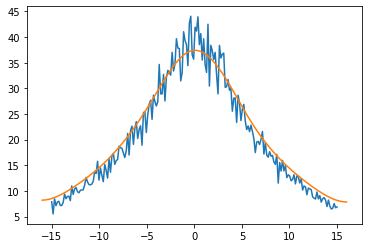

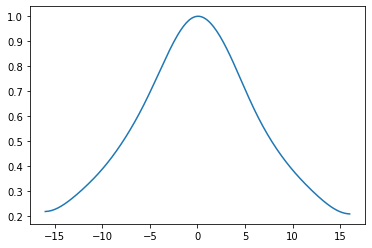

In [36]:
plt.plot(probeFreqs, vis)
plt.plot(freq, vis_smoothed)

plt.show()

plt.plot(freq, vis_smoothed/np.max(vis_smoothed))
plt.show()

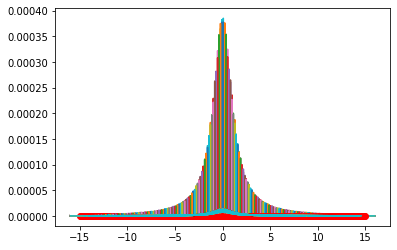

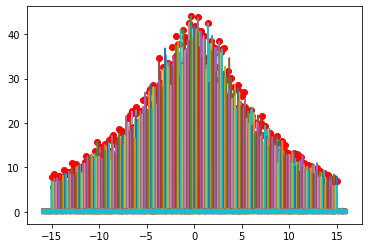

In [11]:
####  PLOT PROBE AND BACKGROUND DATA  ####
plt.figure()

for probe, probeFreq in zip(probeData, probeFreqs):
    plt.plot(freq, probe)
    plt.plot(probeFreq, 0, "o", color="red")

# plt.ylim(
#     [0, 1.1 * np.partition(probeData[round(len(probeData) / 2)], -10)[-10]]
# )  # 10th largest value


plt.figure()
plt.plot(probeFreqs, vis, "o", color="red")
for bg, probe in zip(bgData, probeData):
    plt.plot(freq, (probe - bg) / bg)

# for probeFreq in probeFreqs:
#     plt.axvline(x=probeFreq, color="lightgray", linestyle="--", linewidth=1)

plt.show()

In [37]:
np.savetxt("visCurve.csv", vis, delimiter=",", fmt='%.5f')
np.savetxt("visSmoothed.csv", vis_smoothed/np.max(vis_smoothed), delimiter=",", fmt='%.5f')
np.savetxt("probeFreqs.csv", probeFreqs, delimiter=",", fmt='%.7f')

In [38]:
oldTheory = np.loadtxt("C:\\Users\\Lehnert Lab\\Desktop\\InstrumentControl\\src\\dataProcessing\\visTheory.csv", delimiter=",")

newTheory = np.loadtxt("C:\\Users\\Lehnert Lab\\Desktop\\InstrumentControl\\src\\dataProcessing\\visSmoothed.csv", delimiter=",")

In [39]:
print(np.shape(oldTheory))

print(np.shape(newTheory))

(320000,)
(320000,)


In [63]:
exclusionLine1 = np.loadtxt("C:\\Users\\Lehnert Lab\\Desktop\\InstrumentControl\\plotting\\exclusionLineComparisons\\data\\exclusionLine_2024-02-05_12-55-37.csv", delimiter=",")
exclusionLine2 = np.loadtxt("C:\\Users\\Lehnert Lab\\Desktop\\InstrumentControl\\plotting\\exclusionLineComparisons\\data\\exclusionLine_2024-02-05_13-47-54.csv", delimiter=",")

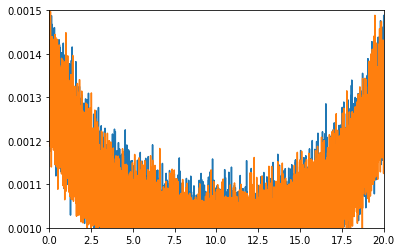

In [65]:
plt.plot(exclusionLine1[1,], exclusionLine1[0,])
plt.plot(exclusionLine2[1,], exclusionLine2[0,])
plt.ylim([0.001,0.0015])
plt.xlim([0,20])

plt.show()